In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
plt.style.use('court.mplstyle')

### runs in notebook_env

# Convenience Functions

In [3]:
def load_profile(profile_number, logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [4]:
def load_history_file(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'),
                         skiprows=5, sep='\s+')

In [5]:
def get_index(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

In [6]:
def plot_composition(profile,elements_dict):
    prof = profile
    for element in elements_dict.keys():
        plt.plot(prof.mass,elements_dict[element],label=element)
    plt.yscale('log')
    plt.ylim(bottom=10**-14)
    plt.legend(bbox_to_anchor=(1,0),loc='lower left')#,bbox_inches='tight')
    plt.title('Composition')
    plt.xlabel(r'Mass Coordinate')
    plt.ylabel(r'log(mass fraction)')
    plt.show()

# He-WD Progenitor

In [7]:
logs_dir = os.path.join('../mesaruns/engineering/40elm_HE_WD/', 'LOGS')
logs_dir

'../mesaruns/engineering/40elm_HE_WD/LOGS'

In [8]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,1955,8.803380e+05,5.944649,0.15,32.474597,-99.0,0.0,1.0,0.999999,...,4.934589e-20,0.990277,0.000048,0.000244,0.000047,0.000298,0.000339,0.148202,0,3
1,10,1736,1.810642e+07,6.392173,0.15,32.474597,-99.0,0.0,1.0,0.999999,...,2.231071e-20,0.990277,0.000048,0.000244,0.000047,0.000298,0.000338,0.148203,0,3
2,20,1718,4.470385e+07,6.421290,0.15,32.474597,-99.0,0.0,1.0,0.999997,...,6.944355e-21,0.990277,0.000048,0.000244,0.000047,0.000298,0.000336,0.148205,0,3
3,30,1701,7.468264e+07,6.515711,0.15,32.474597,-99.0,0.0,1.0,0.999993,...,2.064211e-21,0.990277,0.000048,0.000244,0.000047,0.000298,0.000335,0.148206,0,3
4,40,1689,1.104520e+08,6.551381,0.15,32.474597,-99.0,0.0,1.0,0.999982,...,5.515935e-22,0.990277,0.000048,0.000244,0.000047,0.000298,0.000333,0.148208,0,3
5,50,1676,1.509914e+08,6.648173,0.15,32.474597,-99.0,0.0,1.0,0.999964,...,1.393999e-22,0.990277,0.000048,0.000244,0.000047,0.000298,0.000332,0.148209,0,3
6,60,1662,2.000108e+08,6.693180,0.15,32.474597,-99.0,0.0,1.0,0.999937,...,2.968648e-23,0.990277,0.000048,0.000244,0.000047,0.000298,0.000331,0.148210,0,3
7,70,1659,2.572989e+08,6.806054,0.15,32.474597,-99.0,0.0,1.0,0.999907,...,5.638446e-24,0.990277,0.000048,0.000244,0.000047,0.000298,0.000330,0.148211,0,3
8,80,1655,3.299087e+08,6.875773,0.15,32.474597,-99.0,0.0,1.0,0.999845,...,9.393134e-25,0.990277,0.000048,0.000244,0.000047,0.000298,0.000329,0.148212,0,3
9,90,1659,4.201922e+08,7.015464,0.15,32.474597,-99.0,0.0,1.0,0.999745,...,2.129304e-25,0.990277,0.000048,0.000244,0.000047,0.000298,0.000328,0.148213,0,3


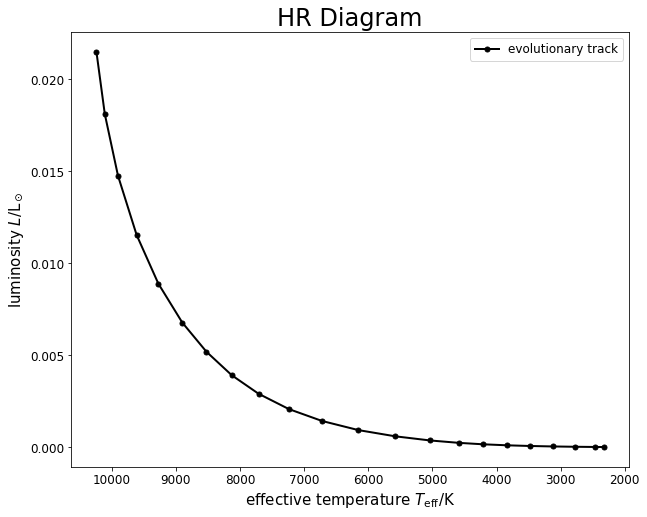

In [46]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [10]:
#change a thing

In [11]:
# np.sort(os.listdir(logs_dir))

In [12]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,100,1,1
1,200,1,2
2,215,3,3


In [67]:
# prof = load_profile(3,logs_dir)
prof = load_profile(4,logs_dir)

In [68]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]
element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]


# elements_dict = {'h1':prof.h1.values, 'he3':prof.he3.values, 'he4':prof.he4.values, 
#                  'c12':prof.c12.values, 'n14':prof.n14.values, 'o16':prof.o16.values, 
#                  'o18':prof.o18.values, 'ne20':prof.ne20.values, 'ne22':prof.ne22.values, 
#                  'mg24':prof.mg24.values}

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']
element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

# print(len(element_list))

elements_dict = dict(zip(element_list, element_value_list))
# elements_dict

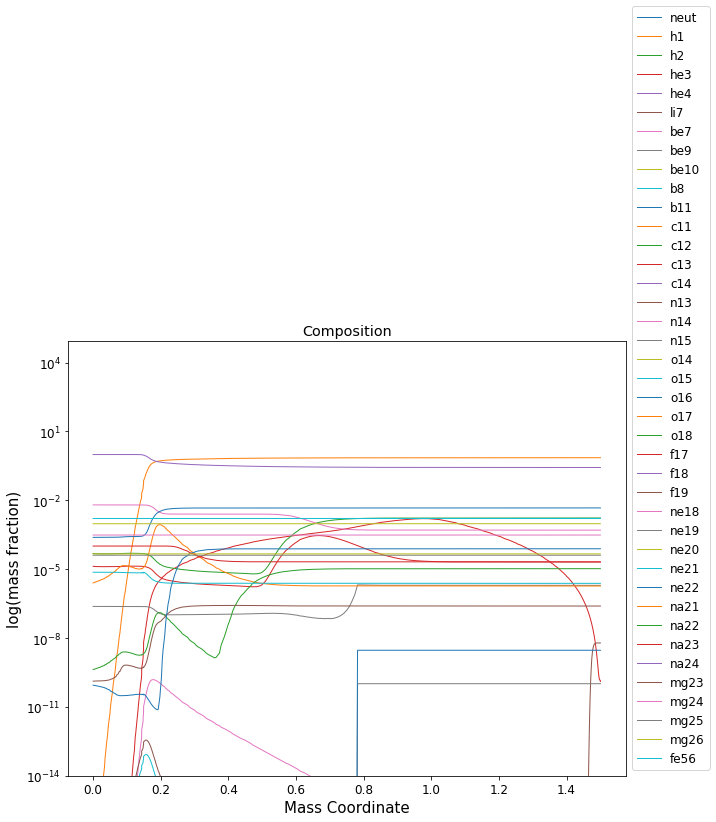

In [69]:
plot_composition(prof,elements_dict)

In [70]:
def mass_averaged_abunds(profile,elements_dict):
    prof = profile
    massfracs_dict = dict.fromkeys(elements_dict.keys())
    total_mass = np.max(prof.mass)
    zone_mass = prof.dm.values / 1.989e33
    print(total_mass)
#     print(zone_mass)
    total_massfrac_sanity = 0
    for element in elements_dict.keys():
        massfraction_perzone = elements_dict[element]
        total_element_mass = 0
        for i in range(0,len(zone_mass)):
            total_element_mass = total_element_mass + (zone_mass[i]*massfraction_perzone[i])
        total_massfrac = total_element_mass/total_mass
        massfracs_dict[element] = total_massfrac
        total_massfrac_sanity = total_massfrac_sanity + total_massfrac
    print('sanity check, should be almost 1:',total_massfrac_sanity) # this should be very close to ONE
        
    return massfracs_dict

In [71]:
def mass_averaged_abunds_nodm(profile,elements_dict):
    prof = profile
    massfracs_dict = dict.fromkeys(elements_dict.keys())
    total_mass = np.max(prof.mass)
    zone_mass = -np.diff(prof.mass.values)#/ 1.989e33
#     print(zone_mass)
#     zone_mass = prof.dm.values / 1.989e33
    print(total_mass)
#     print(zone_mass)
    total_massfrac_sanity = 0
    for element in elements_dict.keys():
        massfraction_perzone = elements_dict[element]
        total_element_mass = 0
        for i in range(0,len(zone_mass)):
            total_element_mass = total_element_mass + (zone_mass[i]*massfraction_perzone[i])
        total_massfrac = total_element_mass/total_mass
        massfracs_dict[element] = total_massfrac
        total_massfrac_sanity = total_massfrac_sanity + total_massfrac
    print('sanity check, should be almost 1:',total_massfrac_sanity) # this should be very close to ONE
        
    return massfracs_dict

In [72]:
massfracs_dict = mass_averaged_abunds_nodm(prof,elements_dict)
massfracs_dict

1.5
sanity check, should be almost 1: 0.9999999218688873


{'neut': 6.251953489107424e-39,
 'h1': 0.6174905169318411,
 'h2': 9.02922672864321e-18,
 'he3': 0.00039386680835883304,
 'he4': 0.37206102790730483,
 'li7': 9.317039848688109e-11,
 'be7': 5.955539274468723e-12,
 'be9': 4.9758833650876794e-11,
 'be10': 3.695263442043357e-57,
 'b8': 4.1273930628115034e-20,
 'b11': 1.4249517141962445e-09,
 'c11': 2.1627906171333655e-32,
 'c12': 0.000974711085024704,
 'c13': 4.476821869874642e-05,
 'c14': 2.252803322861442e-22,
 'n13': 6.4975660965681785e-15,
 'n14': 0.0017969366363265286,
 'n15': 1.0379467663488663e-06,
 'o14': 3.707739832526139e-26,
 'o15': 1.5300141271129884e-15,
 'o16': 0.00411466005626497,
 'o17': 3.375835265404067e-05,
 'o18': 6.8677924419231835e-06,
 'f17': 1.7763419351944594e-18,
 'f18': 1.472840690528773e-17,
 'f19': 2.1430359049823273e-07,
 'ne18': 3.275881847709092e-35,
 'ne19': 2.5361073716298992e-30,
 'ne20': 0.0009617560955751327,
 'ne21': 2.961649372011669e-06,
 'ne22': 6.319608567287859e-05,
 'na21': 9.368989332796308e-22,


In [28]:
massfracs_dict['h1'] = 0.9862247635268961
massfracs_dict['he4'] = 0.0037083479011538823
massfracs_dict

{'h1': 0.9862247635268961,
 'he3': 4.476336880088616e-05,
 'he4': 0.0037083479011538823,
 'c12': 4.035641601180717e-05,
 'n14': 0.0063322575091982365,
 'o16': 0.0002620496160532149,
 'o18': 1.0556212087998062e-05,
 'ne20': 0.0009642153988465604,
 'ne22': 7.7987503385626e-05,
 'mg24': 0.002038006065942077}

In [16]:
# 7.004545052770011493e-01 (0.70)
# 8.873392958886305827e-05 
# 2.894556372258887400e-01 (0.28)
# 1.621717821051862083e-03 
# 7.346633148323512526e-04 
# 4.553059960063229362e-03 
# 1.055934500851029464e-05 
# 9.645015630668412948e-04 
# 7.801064887067478144e-05 
# 2.038610914627840207e-03



# Creating abund.dat

In [16]:
logs_dir = os.path.join('../mesaruns/engineering/RCB_eng_bignet/', 'LOGS')
logs_dir

'../mesaruns/engineering/RCB_eng_bignet/LOGS'

In [17]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,rcb_ne22,rcb_na21,rcb_na22,rcb_na23,rcb_na24,rcb_mg23,rcb_mg24,rcb_mg25,rcb_mg26,rcb_fe56
0,351,961,3.581627e-08,-7.445920,0.8,33.201596,-37.527310,0.0,0.630958,0.620255,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622
1,355,601,2.665304e-07,-7.129195,0.8,33.201596,-37.367023,0.0,0.633338,0.623489,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622
2,360,702,9.297433e-07,-6.733288,0.8,33.201596,-37.302495,0.0,0.634650,0.618045,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622


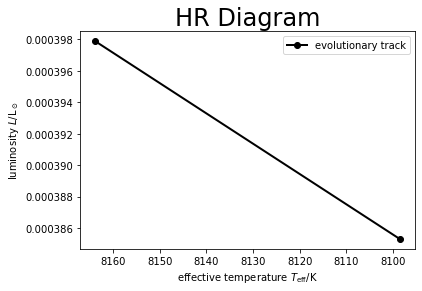

In [18]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [19]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,1,2,1
1,50,1,2
2,66,3,3
3,67,3,4
4,68,2,5
5,100,1,6
6,150,1,7
7,200,1,8
8,250,1,9
9,300,1,10


In [20]:
prof = load_profile(3,logs_dir)
prof

,zone,mass,logR,logT,logRho,logP,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,dm,...,mg25,mg26,fe56,log_D_mix,log_D_mix_non_rotation,log_D_conv,tau,omega,j_rot,extra_heat
0,1,8.000000e-01,-1.013250,4.293628,-7.514615,4.873915,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.666667e-01,0.0,0.0,0.0
1,2,8.000000e-01,-1.013341,4.379724,-7.237434,5.245923,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,3.473428e+00,0.0,0.0,0.0
2,3,8.000000e-01,-1.013389,4.430111,-7.091889,5.443381,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.569571e+00,0.0,0.0,0.0
3,4,8.000000e-01,-1.013424,4.466241,-6.993274,5.578659,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,9.879839e+00,0.0,0.0,0.0
4,5,8.000000e-01,-1.013452,4.494679,-6.918981,5.681679,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,1.339212e+01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,1.000058e-06,-3.472715,7.729079,4.567305,20.664903,0.699532,0.280457,0.020011,9.942630e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.913013e+13,0.0,0.0,0.0
877,878,5.000293e-07,-3.573063,7.729084,4.567326,20.664934,0.699532,0.280457,0.020011,4.971315e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.918229e+13,0.0,0.0,0.0
878,879,2.500147e-07,-3.673409,7.729087,4.567339,20.664954,0.699532,0.280457,0.020011,2.485657e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.922368e+13,0.0,0.0,0.0
879,880,1.250074e-07,-3.773755,7.729089,4.567348,20.664966,0.699532,0.280457,0.020011,1.242829e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.925654e+13,0.0,0.0,0.0


In [21]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']

element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]

element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

elements_dict = dict(zip(element_list, element_value_list))

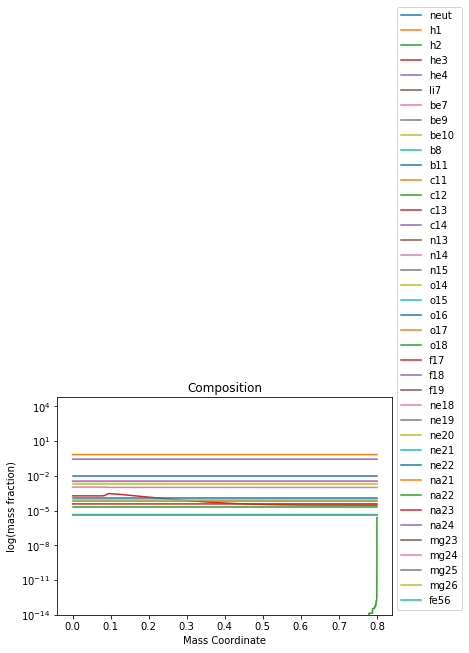

In [22]:
plot_composition(prof,elements_dict)

In [136]:

def create_abund_file(prof,elements_dict,he_progenitor_massfracs):
    logxq = prof.logxq.values
    xq = 10**logxq
    masscoord = prof.mass.values
    print(len(xq))
    print(len(elements_dict.keys()))
    
    output_file = open('../abund.dat','w')
    output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')
    
    for i in range(0,len(xq)):
        if masscoord[i] > 0.5:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                write_str = write_str+'\t'+f'{he_progenitor_massfracs[element]:f}'#':.7f}'
            print(write_str)
            output_file.write(write_str+'\n')
        else:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                if element in ['c12','o16']:
                    write_str = write_str+'\t'+str(0.5)
                else:
                    write_str = write_str+'\t'+str(0.0)
            print(write_str)
            output_file.write(write_str+'\n')
#             print('interior')
            
    output_file.close()

In [137]:
create_abund_file(prof,elements_dict,massfracs_dict)

881
40
1.0000000000000327e-99	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000408	0.0000114	0.0000000	0.0000000	0.0063236	0.0000004	0.0000000	0.0000000	0.0002554	0.0000093	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0009575	0.0000072	0.0000000	0.0000000	0.0000000	0.0001021	0.0000000	0.0000000	0.0003082	0.0000407	0.0000465	0.0016215
1.562499999995966e-14	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000408	0.0000114	0.0000000	0.0000000	0.0063236	0.0000004	0.0000000	0.0000000	0.0002554	0.0000093	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0009575	0.0000072	0.0000000	0.0000000	0.0000000	0.0001021	0.0000000	0.0000000	0.0003082	0.0000407	0.0000465	0.0016215
3.124999999991933e-14	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000